Text(0, 0.5, 'amplitude')

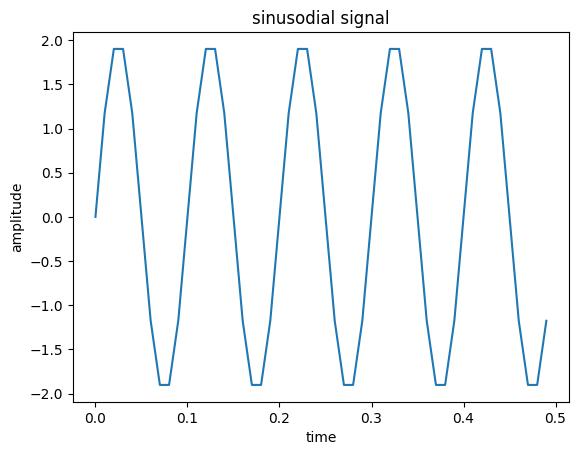

In [5]:
import numpy as np
import matplotlib.pyplot  as plt

a=2           #amplitude
frequency=10
f_s=100   #sampling Frequency
dur=5/frequency

t = np.arange(0, dur,1/f_s)

#signal
sin_signal=a*np.sin(2*np.pi*frequency*t)


plt.title("sinusodial signal")
plt.plot(t,sin_signal)
plt.xlabel("time")
plt.ylabel("amplitude")


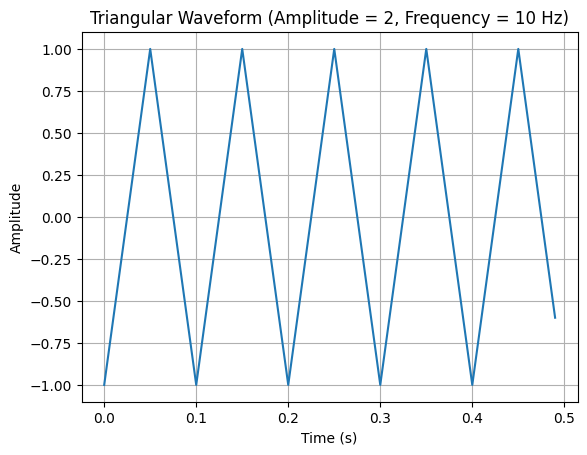

In [6]:
frequency = 10  # Frequency of the triangular wave in Hz
amplitude = 2   # Amplitude of the triangular wave
cycles = 5      # Number of cycles to plot
sampling_frequency = 100  

duration = cycles / frequency  

t = np.arange(0, duration,1/sampling_frequency)

# Generate the triangular wave
triangle_wave = amplitude * np.abs(2 * (t * frequency - np.floor(t * frequency + 0.5)))-amplitude/2



# Plot the triangular wave
plt.plot(t, triangle_wave)
plt.title('Triangular Waveform (Amplitude = 2, Frequency = 10 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


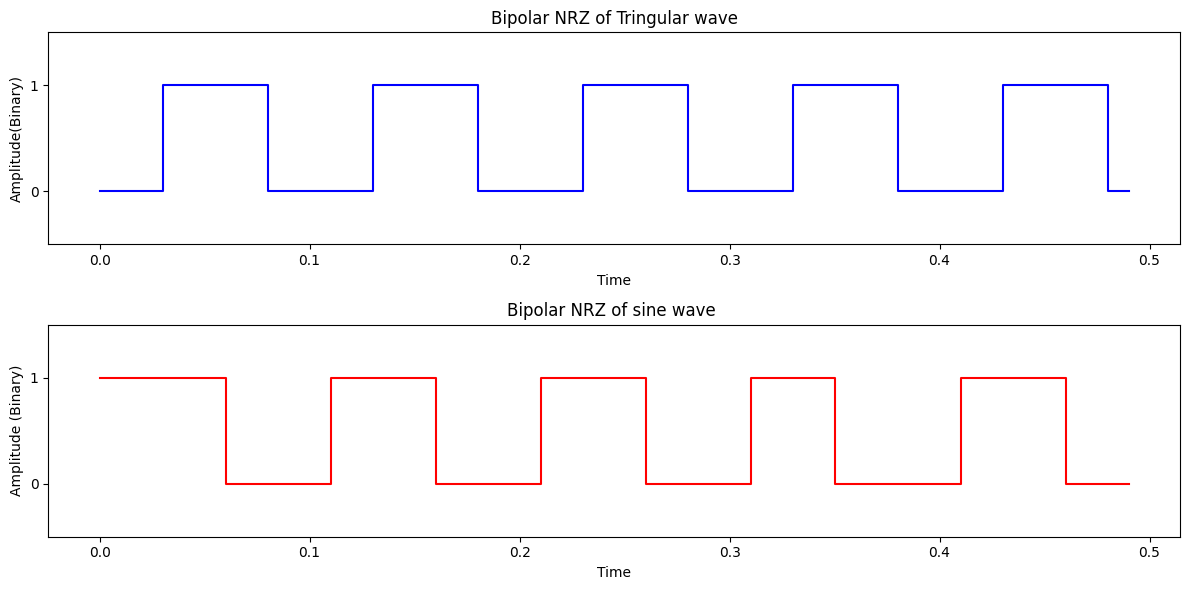

In [7]:
# Quantization levels
quantization_levels = np.array([-1, 1])  # Bipolar levels

# Uniform PCM Encoding
def uniform_pcm_encoding(signal, levels):
    encoded_signal = []
    for sample in signal:
        if sample >= 0:
            encoded_signal.append(1)
        else:
            encoded_signal.append(0)
    return encoded_signal

# Encode the analog signal
encoded_signal = uniform_pcm_encoding(sin_signal, quantization_levels)
encoded_signal1 = uniform_pcm_encoding(triangle_wave, quantization_levels)

#plot for NRZ of triangular

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.step(t, encoded_signal1, where='post', color='blue')
plt.title('Bipolar NRZ of Tringular wave')
plt.xlabel('Time')
plt.ylabel('Amplitude(Binary)')
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1], ['0', '1'])

#plot 
plt.subplot(2, 1, 2)
plt.step(t, encoded_signal, where='post', color='red')
plt.title('Bipolar NRZ of sine wave ')
plt.xlabel('Time')
plt.ylabel('Amplitude (Binary)')
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1], ['0', '1'])

plt.tight_layout()
plt.show()


NameError: name 't_tri' is not defined

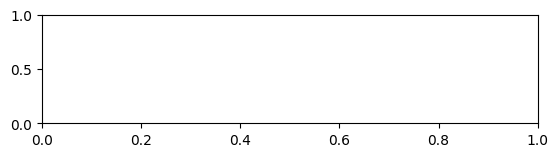

In [8]:
# Time multiplexing the signals
multiplexed_signal = np.zeros(len(triangle_wave) * 2)
multiplexed_signal[::2] = triangle_wave
multiplexed_signal[1::2] = sin_signal[:len(triangle_wave)]  # Adjust the length of sin_signal

# Plotting
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t_tri, triangle_wave, color='blue')
plt.title('Triangular Wave Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t[:len(triangle_wave)], sin_signal[:len(triangle_wave)], color='red')
plt.title('Sinusoidal Wave Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.step(np.arange(len(multiplexed_signal)), multiplexed_signal, where='post', color='green')
plt.title('Multiplexed Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
variances = [0.001, 0.01, 0.1, 1, 10]

plt.figure(figsize=(10, 6))

for i, variance in enumerate(variances):
    # Generate AWGN with specified variance
    noise = np.random.normal(0, np.sqrt(variance), len(multiplexed_signal))
    
    # Add noise to the multiplexed signal
    noisy_signal = multiplexed_signal + noise
    
    # Plotting
    plt.subplot(len(variances), 1, i+1)
    plt.step(np.arange(len(noisy_signal)), noisy_signal, where='post', color='green')
    plt.title(f'Multiplexed Signal with AWGN (Variance = {variance})')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Demultiplexing without noise
demultiplexed_tri = multiplexed_signal[::2]
demultiplexed_sin = multiplexed_signal[1::2][:len(demultiplexed_tri)]

# Adding AWGN noise
variance = 0.1  # Example variance for AWGN
noise = np.random.normal(0, np.sqrt(variance), len(multiplexed_signal))
noisy_signal = multiplexed_signal + noise

# Demultiplexing with noise
noisy_demultiplexed_tri = noisy_signal[::2]
noisy_demultiplexed_sin = noisy_signal[1::2][:len(noisy_demultiplexed_tri)]

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(t_tri, demultiplexed_tri, color='blue')
plt.title('Demultiplexed Triangular Wave Signal (No Noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t[:len(demultiplexed_sin)], demultiplexed_sin, color='red')
plt.title('Demultiplexed Sinusoidal Wave Signal (No Noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t_tri, noisy_demultiplexed_tri, color='blue')
plt.title('Demultiplexed Triangular Wave Signal (With Noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t[:len(noisy_demultiplexed_sin)], noisy_demultiplexed_sin, color='red')
plt.title('Demultiplexed Sinusoidal Wave Signal (With Noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming demultiplexed_sin and demultiplexed_tri are already defined

# Thresholds for determining binary states
sin_threshold = 0.5  # Example threshold for sinusoidal signal
tri_threshold = 0.5  # Example threshold for triangular signal

# Regenerate binary NRZ pulses from demultiplexed signals
binary_sin_signal = np.where(demultiplexed_sin > sin_threshold, 1, 0)
binary_tri_signal = np.where(demultiplexed_tri > tri_threshold, 1, 0)

# Plotting regenerated binary NRZ pulses
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(binary_sin_signal, color='red', marker='o', linestyle='-', markersize=5)
plt.title('Regenerated Binary NRZ Sinusoidal Signal')
plt.xlabel('Sample')
plt.ylabel('Binary Value')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(binary_tri_signal, color='blue', marker='o', linestyle='-', markersize=5)
plt.title('Regenerated Binary NRZ Triangular Signal')
plt.xlabel('Sample')
plt.ylabel('Binary Value')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Assuming binary_sin_signal and binary_tri_signal are already defined

# Define the number of quantization levels
quantization_levels = 8  # Example: 8-bit quantization

# Maximum and minimum values of the analog signal
analog_max = 2  # Maximum amplitude of the original analog signal
analog_min = -2 # Minimum amplitude of the original analog signal

# Calculate the quantization step size
quantization_step = (analog_max - analog_min) / (quantization_levels - 1)

# PCM Demodulation for sinusoidal signal
quantized_sin_signal = analog_min + binary_sin_signal * quantization_step

# PCM Demodulation for triangular signal
quantized_tri_signal = analog_min + binary_tri_signal * quantization_step

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(quantized_sin_signal, color='red', marker='o', linestyle='-', markersize=5)
plt.title('Quantized Sinusoidal Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(quantized_tri_signal, color='blue', marker='o', linestyle='-', markersize=5)
plt.title('Quantized Triangular Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from scipy import signal

# Define LPF parameters
cutoff_frequency = 10  # Example cutoff frequency for the LPF
nyquist_frequency = 0.5 * f_s  # Nyquist frequency
normalized_cutoff = cutoff_frequency / nyquist_frequency

# Design LPF
b, a = signal.butter(4, normalized_cutoff, btype='low')

# Apply LPF to quantized sinusoidal signal
reconstructed_sin_signal = signal.filtfilt(b, a, quantized_sin_signal)

# Apply LPF to quantized triangular signal
reconstructed_tri_signal = signal.filtfilt(b, a, quantized_tri_signal)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(reconstructed_sin_signal, color='red', linestyle='-', linewidth=2)
plt.title('Reconstructed Sinusoidal Signal using LPF')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(reconstructed_tri_signal, color='blue', linestyle='-', linewidth=2)
plt.title('Reconstructed Triangular Signal using LPF')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


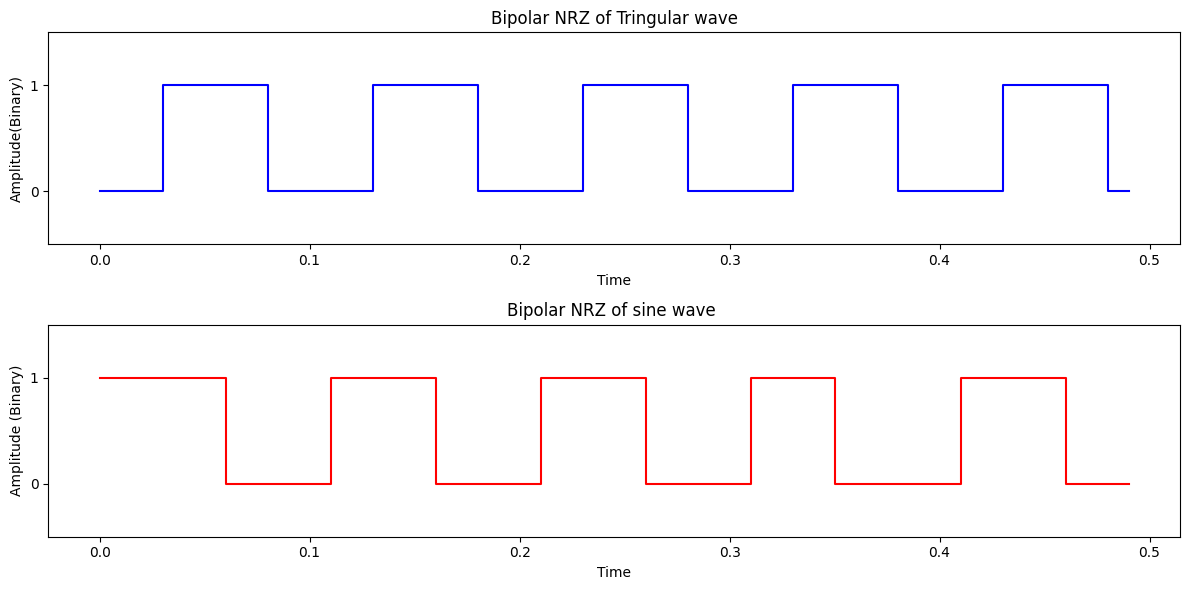

NameError: name 't_tri' is not defined

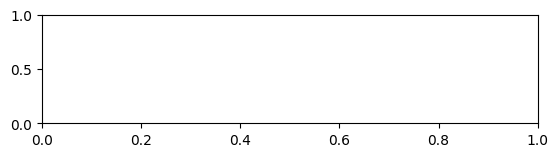

In [ ]:





# In[14]:





# In[92]:





# In[4]:







# In[5]:




# In[9]:





# In[10]:




# In[11]:





# In[12]:




